In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32)) # need to be in float32 to avoid errors later
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # need to reshape y to be (n x 1)

n_samples, n_features = X.shape

# Define Model

In [4]:
model = nn.Linear(in_features=n_features, out_features=1)
criterion = nn.MSELoss()
lr = 0.01
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
n_epoch = 100

epoch 10: Loss=4419.3691
epoch 20: Loss=3297.3713
epoch 30: Loss=2485.2798
epoch 40: Loss=1896.8829
epoch 50: Loss=1470.1505
epoch 60: Loss=1160.3883
epoch 70: Loss=935.3489
epoch 80: Loss=771.7363
epoch 90: Loss=652.7003
epoch 100: Loss=566.0400


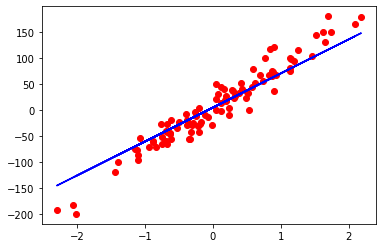

In [5]:
for epoch in range(n_epoch):
    y_pred = model(X)
    loss_val = criterion(y, y_pred)
    loss_val.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print(f'epoch {epoch+1}: Loss={loss_val.item():.4f}') 

final_pred = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, final_pred, 'b')
plt.show()
